<a href="https://colab.research.google.com/github/AkhilKanike/StatisticalLearningAndDataMiningII/blob/Data-ingestion/Galaxy_NGC7531_Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Radial Velocity of Galaxy NGC7531

SUMMARY:

       The galaxy data frame records the  radial  velocity  of  a spiral  galaxy  measured  at 323 points in the area of sky which it covers.  
      All the measurements  lie  within  seven slots  crossing at the origin.  The positions of the measurements given by four variables (columns).

DATA DESCRIPTION:

 - east.west: the east-west coordinate.  
        The origin,  (0,0),  is near  the  center of the galaxy, east is negative, west is positive.

 - north.south: the north-south coordinate.  
        The origin, (0,0), is near the center of the galaxy, south is negative, north is positive.

 - angle: 
        degrees of counter-clockwise rotation from the horizontal of the slot within which the observation lies.

 - radial.position: 
        signed  distance  from  origin;  negative  if east-west coordinate is negative.

 - velocity: 
        radial velocity measured in km/sec.

SOURCE:

      Buta, R. (1987)  The  Structure  and  Dynamics  of  Ringed Galaxies III:  Surface  Photometry and Kinematics of the Ringed Nonbarred Spiral NGC7531. 
      The  Astrophysical  J.Supplement Ser. Vol. 64, pp. 1--37.
      John M. Chambers and Trevor J. Hastie, (eds.)  Statistical Models in S, Wadsworth and Brooks, Pacific Grove, CA 1992, pg. 352.

In [1]:
!wget https://web.stanford.edu/~hastie/ElemStatLearn/datasets/galaxy.data


--2021-09-29 03:29:17--  https://web.stanford.edu/~hastie/ElemStatLearn/datasets/galaxy.data
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21386 (21K)
Saving to: ‘galaxy.data’

galaxy.data         100%[===================>]  20.88K  --.-KB/s    in 0.1s    

2021-09-29 03:29:18 (152 KB/s) - ‘galaxy.data’ saved [21386/21386]



In [5]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [6]:
X = pd.read_csv("galaxy.data")

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [8]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,240.277870,152.159955,-6.380966,4.491895
1,236.471762,132.396053,-6.238499,5.333317
2,235.363875,131.628317,-6.476663,3.923470
3,235.470186,139.408855,-6.886112,1.500550
4,233.283010,131.042652,-6.972024,0.991209
...,...,...,...,...
318,-211.112583,-120.066943,-35.881191,-7.609900
319,-213.299759,-128.433146,-35.967103,-8.119239
320,-219.658717,-166.164551,-35.448604,-5.015965
321,-219.822228,-160.283629,-35.819990,-7.213757


In [9]:
import plotly.express as px

df = pd.read_csv("galaxy.data")
features = ['east.west', 'north.south', 'angle', 'radial.position', 'velocity']

fig = px.scatter_matrix(
    df,
    dimensions=features
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [10]:
import plotly.express as px
from sklearn.decomposition import PCA

df = pd.read_csv("galaxy.data")

X = df[['east.west', 'north.south', 'angle', 'radial.position', 'velocity']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [11]:
X

,east.west,north.south,angle,radial.position,velocity
0,8.462789,-38.173172,102.5,39.099998,1769
1,7.964978,-35.927692,102.5,36.799999,1749
2,7.467167,-33.682213,102.5,34.500001,1749
3,6.969356,-31.436731,102.5,32.200000,1758
4,6.471544,-29.191250,102.5,29.899999,1750
...,...,...,...,...,...
318,-9.090464,41.004433,102.5,-42.000000,1456
319,-9.588275,43.249912,102.5,-44.299999,1448
320,-10.042798,45.300137,102.5,-46.400002,1409
321,-10.540609,47.545616,102.5,-48.700001,1416


In [12]:
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [13]:
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings

array([[ -5.04684087,   0.86351203,  10.00143982],
       [ 20.47284011,  -0.68532493,   6.95673775],
       [ -0.24190455, -38.22818779,   1.04425356],
       [-17.9422372 ,   1.91488581,  18.22459485],
       [-94.20978322,  -0.46171764,  -2.49755493]])

In [14]:
!pip install kneed

In [15]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [17]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42)

In [18]:
kmeans.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [19]:
kmeans2 = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans2.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.inertia_


692.6314913851015

In [21]:
kmeans2.inertia_

1017.4662600517136

Text(0, 0.5, 'Inertia')

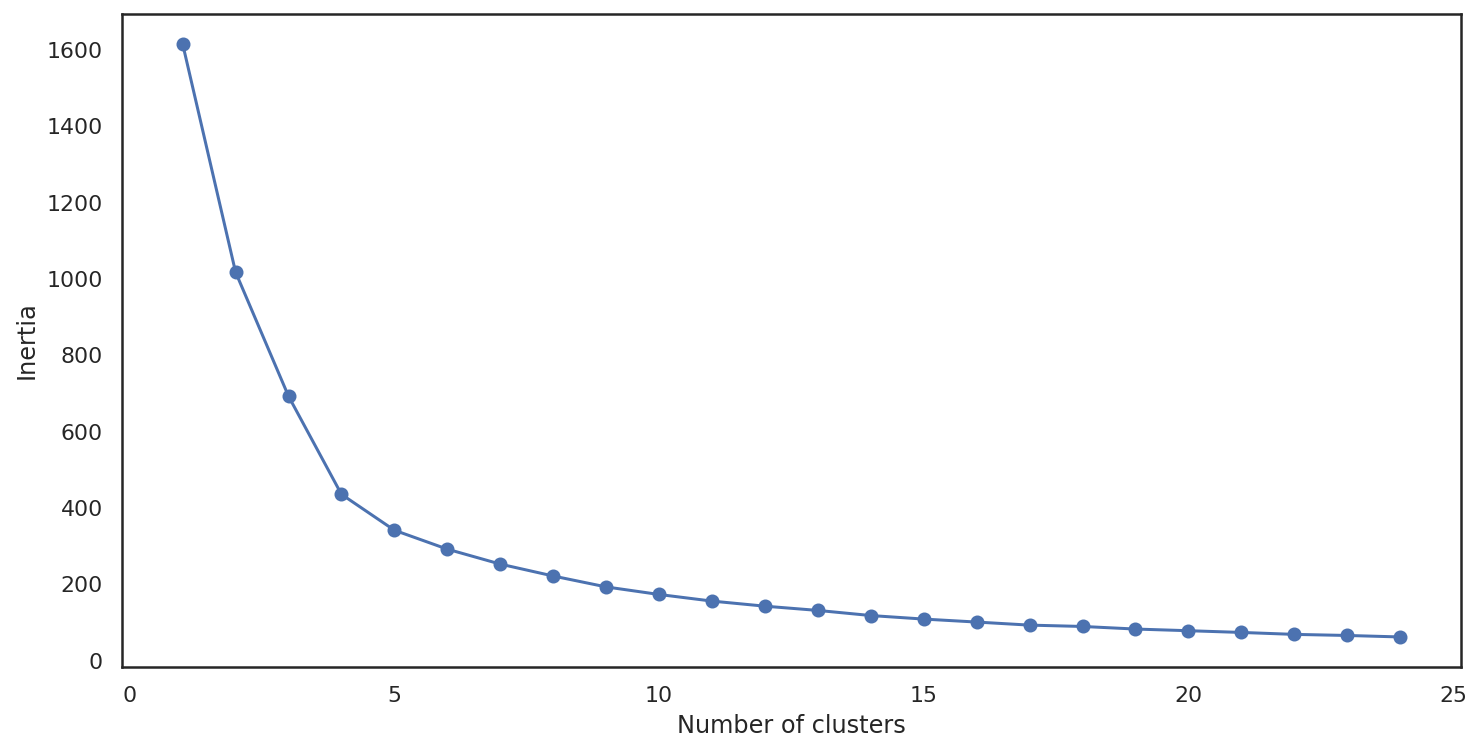

In [22]:
SSE = []
for cluster in range(1,25):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,25), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [23]:
kmeans3 = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans3.fit(scaled_X)
pred3 = kmeans3.predict(scaled_X)

In [24]:

frame = pd.DataFrame(scaled_X)
frame['cluster'] = pred3
frame['cluster'].value_counts()

2    135
1     97
0     91
Name: cluster, dtype: int64

In [25]:
import plotly.express as px
from sklearn.decomposition import PCA

df = pd.read_csv("galaxy.data")

X = df[['east.west', 'north.south', 'angle', 'radial.position', 'velocity']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,color=frame['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [26]:
kmeans4 = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans4.fit(scaled_X)
pred4 = kmeans4.predict(scaled_X)

frame4 = pd.DataFrame(scaled_X)
frame4['cluster'] = pred4
frame4['cluster'].value_counts()

3    103
2     95
0     64
1     61
Name: cluster, dtype: int64

In [27]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,color=frame4['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [28]:
kmeans5 = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans5.fit(scaled_X)
pred5 = kmeans5.predict(scaled_X)

frame5 = pd.DataFrame(scaled_X)
frame5['cluster'] = pred5
frame5['cluster'].value_counts()

0    75
1    73
2    60
3    58
4    57
Name: cluster, dtype: int64

In [45]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,color=frame5['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [30]:
from sklearn.cluster import SpectralClustering

In [36]:
from sklearn.cluster import SpectralClustering
import numpy as np

clustering = SpectralClustering(n_clusters=3,
        assign_labels='discretize',
        random_state=0).fit(scaled_X)


In [37]:
clustering.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [39]:
clustering = SpectralClustering(n_clusters=3,
        assign_labels='discretize',
        random_state=0).fit(scaled_X)

frame_spec = pd.DataFrame(scaled_X)
frame_spec['cluster'] = clustering.labels_
frame_spec['cluster'].value_counts()

import plotly.express as px
from sklearn.decomposition import PCA

df = pd.read_csv("galaxy.data")

X = df[['east.west', 'north.south', 'angle', 'radial.position', 'velocity']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,color=frame_spec['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

2    125
0    105
1     93
Name: cluster, dtype: int64

In [40]:
import plotly.express as px
from sklearn.decomposition import PCA

df = pd.read_csv("galaxy.data")

X = df[['east.west', 'north.south', 'angle', 'radial.position', 'velocity']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,color=frame_spec['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [41]:
clustering = SpectralClustering(n_clusters=5,
        assign_labels='discretize',
        random_state=0).fit(scaled_X)

frame_spec = pd.DataFrame(scaled_X)
frame_spec['cluster'] = clustering.labels_
frame_spec['cluster'].value_counts()

import plotly.express as px
from sklearn.decomposition import PCA

df = pd.read_csv("galaxy.data")

X = df[['east.west', 'north.south', 'angle', 'radial.position', 'velocity']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,color=frame_spec['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [44]:
clustering = SpectralClustering(n_clusters=5,
        assign_labels='discretize',
        random_state=0).fit(scaled_X)

frame_spec = pd.DataFrame(scaled_X)
frame_spec['cluster'] = clustering.labels_
frame_spec['cluster'].value_counts()

import plotly.express as px
from sklearn.decomposition import PCA

df = pd.read_csv("galaxy.data")

X = df[['east.west', 'north.south', 'angle', 'radial.position', 'velocity']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,color=frame_spec['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [46]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit(scaled_X)

frame_spec = pd.DataFrame(scaled_X)
frame_spec['cluster'] = clustering.labels_
frame_spec['cluster'].value_counts()

import plotly.express as px
from sklearn.decomposition import PCA

df = pd.read_csv("galaxy.data")

X = df[['east.west', 'north.south', 'angle', 'radial.position', 'velocity']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,color=frame_spec['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()